<a href="https://colab.research.google.com/github/Igor-Des/nn-itp31-2022-drapeza-igor/blob/1laba/schemaA_Hebb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from sklearn.metrics import accuracy_score

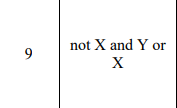

In [ ]:
print("boolean expression: not X and Y or X")
print('%10s %10s %10s' % ('X','Y','Result'))
def bitFunc(x, y):
  print('%10s %10s %10s' % (str(not x), str(y == 1 or x == 1), str(not x and (y == 1 or x == 1))))



bitFunc(0,0)
bitFunc(0,1)
bitFunc(1,0)
bitFunc(1,1)

boolean expression: not X and Y or X
         X          Y     Result
      True      False      False
      True       True       True
     False       True      False
     False       True      False


In [ ]:
def step_func(x):
  if(x > 0):
    return 1
  else:
    return 0

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def get_sum(self, x):
    sum = self.bias
    for i in range(len(self.weights)):
      sum += self.weights[i] * x[i]
    #print("sum for X: " + str(x) + "; sum = " + str(sum))
    return sum

  def feed(self, x):
    y = step_func(self.get_sum(x))
    return y
    
  def print_params(self):
    n_str = ''
    for i in range(len(self.weights)):
      n_str += str(self.weights[i]) + " "
    print(n_str + str(self.bias))

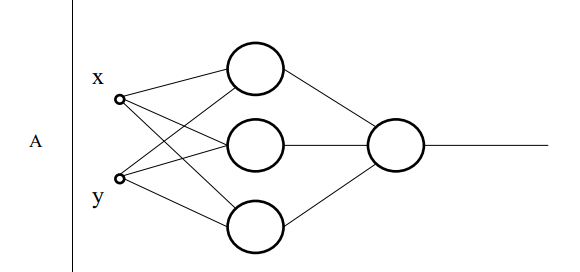

In [ ]:
class Network:
  def __init__(self):
    self.n1 = Neuron([random.randint(-5, 5), random.randint(-5, 5)], random.randint(-5, 5))
    self.n2 = Neuron([random.randint(-5, 5), random.randint(-5, 5)], random.randint(-5, 5))
    self.n3 = Neuron([random.randint(-5, 5), random.randint(-5, 5)], random.randint(-5, 5))
    self.o1 = Neuron([random.randint(-5, 5), random.randint(-5, 5), random.randint(-5, 5)], random.randint(-5, 5))

  def printNeurons(self):
    print("[N1: " + str(round(self.n1.weights[0], 2)) + " " + str(round(self.n1.weights[1], 2)) + " N2: " +
                str(round(self.n2.weights[0], 2)) + " " + str(round(self.n2.weights[1], 2)) + " N3: " +
                str(round(self.n3.weights[0], 2)) + " " + str(round(self.n3.weights[1], 2)) + " O1: " +
                str(round(self.o1.weights[0], 2)) + " " + str(round(self.o1.weights[1], 2)) + " " + str(round(self.o1.weights[2], 2)) + "]")
  def predict(self, data):
    y_pred = []
    for x in data:
      h1 = self.n1.feed(x)
      h2 = self.n2.feed(x)
      h3 = self.n3.feed(x)
      h = [h1, h2, h3]
      y_pred.append(self.o1.feed(h))
    return(y_pred)

  def trainHebb(self, data, y_trues):
    epochs = 30
    self.printNeurons() # вывод рандомно сгенерированных весов для нейронов
    for epoch in range(epochs): # для каждой эпохи корректируем веса
      for x, y_true in zip(data, y_trues):
        h1 = self.n1.feed(x)
        h2 = self.n2.feed(x)
        h3 = self.n3.feed(x)
        h = [h1, h2, h3]
        out1 = self.o1.feed(h)
        #print("out1 is " + str(out1))
        if(out1 > y_true):
          for i in range(len(x)):
            self.n1.weights[i] -= x[i]
            self.n2.weights[i] -= x[i]
            self.n3.weights[i] -= x[i]
            self.o1.weights[i] -= h[i]
          self.n1.bias -= 1
          self.n2.bias -= 1
          self.n3.bias -= 1
          self.o1.bias -= 1
        elif(out1 < y_true):
          for i in range(len(x)):
            self.n1.weights[i] += x[i]
            self.n2.weights[i] += x[i]
            self.n3.weights[i] += x[i]
            self.o1.weights[i] += h[i]
          self.n1.bias += 1
          self.n2.bias += 1
          self.n3.bias += 1
          self.o1.bias += 1
          
      y_preds = self.predict(data)
      acc = accuracy_score(y_trues, y_preds)
      print("Epoch %d acc: %.3f" % (epoch, acc))
      self.printNeurons()      
    y_preds = self.predict(data)
    acc = accuracy_score(y_trues, y_preds)
    print("acc: " + str(acc))
    self.printNeurons()

In [ ]:
all_data = np.array([
  [0, 0],
  [0, 1],
  [1, 0],
  [1, 1],
])

all_y_trues = np.array([
  0,
  1,
  0,
  0,
])

network = Network()
network.trainHebb(all_data, all_y_trues)

[N1: 5 -5 N2: -5 -4 N3: 5 -5 O1: 0 -4 2]
Epoch 0 acc: 0.750
[N1: 5 -4 N2: -5 -3 N3: 5 -4 O1: 0 -3 2]
Epoch 1 acc: 0.750
[N1: 4 -4 N2: -6 -3 N3: 4 -4 O1: -1 -2 2]
Epoch 2 acc: 0.750
[N1: 4 -3 N2: -6 -2 N3: 4 -3 O1: -1 -1 2]
Epoch 3 acc: 0.750
[N1: 3 -2 N2: -7 -1 N3: 3 -2 O1: -2 -1 2]
Epoch 4 acc: 0.750
[N1: 2 -1 N2: -8 0 N3: 2 -1 O1: -3 -1 2]
Epoch 5 acc: 0.750
[N1: 1 0 N2: -9 1 N3: 1 0 O1: -3 0 2]
Epoch 6 acc: 0.750
[N1: 0 1 N2: -10 2 N3: 0 1 O1: -3 1 2]
Epoch 7 acc: 0.750
[N1: -1 1 N2: -11 2 N3: -1 1 O1: -3 1 2]
Epoch 8 acc: 0.750
[N1: -2 1 N2: -12 2 N3: -2 1 O1: -3 2 2]
Epoch 9 acc: 0.750
[N1: -2 2 N2: -12 3 N3: -2 2 O1: -2 3 2]
Epoch 10 acc: 1.000
[N1: -2 2 N2: -12 3 N3: -2 2 O1: -3 2 2]
Epoch 11 acc: 1.000
[N1: -2 2 N2: -12 3 N3: -2 2 O1: -3 2 2]
Epoch 12 acc: 1.000
[N1: -2 2 N2: -12 3 N3: -2 2 O1: -3 2 2]
Epoch 13 acc: 1.000
[N1: -2 2 N2: -12 3 N3: -2 2 O1: -3 2 2]
Epoch 14 acc: 1.000
[N1: -2 2 N2: -12 3 N3: -2 2 O1: -3 2 2]
Epoch 15 acc: 1.000
[N1: -2 2 N2: -12 3 N3: -2 2 O1: -3 